<h1><center>Credict Card Risk Prediction Research</center></h1>
    
**<center><em>Qinzheng Xu</em></center>**
    
**<center><em>Tulane University</em></center>**

---

## 📚 Table of Contents
1. [Module Importation](#1-module-importation)
2. [Load Data](#2-load-data)
3. [Rename Data Column and Label Encoding](#3-rename-data-column-and-label-encoding)
4. [Handle Missing Values](#4-handle-missing-values)
5. [Data Visualization](#5-data-visualization)
6. [Train and Test Sample Preparation](#6-train-and-test-sample-preparation)
7. [Machine Learning Analysis](#7-machine-learning-analysis)
8. [Model Comparison](#8-model-comparison)
9. [Classification Report](#9-classification-report)

---

## 1. Module Importation
[Back to Top](#credit-card-risk-prediction-research)

In [1]:
# Load Modules.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

- **Pandas (`pd`)**: For handling and manipulating structured data 🗃️.
- **NumPy (`np`)**: For numerical operations, especially on arrays 🧮.
- **Seaborn (`sns`) & Matplotlib (`plt`)**: For data visualization 🖼️.
- **Scikit-learn Modules**: 
  - For various machine learning tasks, such as model building 🛠️ (e.g., `LogisticRegression`, `RandomForestClassifier`).
  - Data preprocessing 🧹 (`StandardScaler`, `LabelEncoder`).
  - Model evaluation 🏅 (`classification_report`, `accuracy_score`).
- **Warnings**: To suppress any unwanted warnings that might clutter your notebook output ⚠️.

## 2 Load Data
[Back to Top](#credit-card-risk-prediction-research)

In [2]:
# Load dataset
data = pd.read_csv("cc_approvals.data", header=None)

# Inspect data
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 3. 📚Rename Data Column and Label Encoding
[back](#-qinzheng-xu)

In [3]:
# Rename columns for clarity
data.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Target']

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in ['Feature1', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Target']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("Length: ", len(data))
data.head(5)

Length:  690


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Target
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


- **Column Renaming 🏷️**: 
  - The columns are renamed for better clarity.
  - This makes your dataset easier to work with, especially when performing exploratory data analysis (EDA) or building models.

- **Label Encoding 🔢**:
  - Categorical variables are converted into numerical format using `LabelEncoder`.
  - This step is crucial because machine learning models require numerical input.
  - For example, if you have a column like **Gender** with values `Male` and `Female`, Label Encoding will transform these into `0` and `1`, respectively.

## 4. 📚Handle Missing Values
[back](#-qinzheng-xu)

In [4]:
# Check for non-numeric values and convert columns to numeric, replacing non-numeric entries with NaN
data = data.apply(pd.to_numeric, errors='coerce')
data = data.replace("?", np.NaN)

# Drop rows with NaN values
data.dropna(inplace=True)

print("Length: ", len(data))


Length:  678


- **Initial Dataset Size**: 690 observations 📊
- **Final Dataset Size**: 678 observations 📉
- **Rows Removed**: 12 observations 🧹

The reduction in the number of observations from **690** to **678** indicates that **12 observations** have been removed or filtered out during the data preprocessing phase.

## 4. 📚Data Visualization
[back](#-qinzheng-xu)

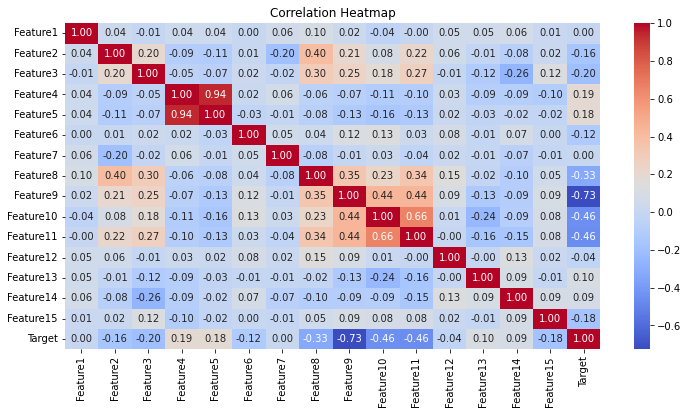

In [5]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This image represents a **correlation matrix heatmap**, showcasing the correlation coefficients between pairs of features in a dataset. Here's how to interpret it:

**1. Understanding Correlation Coefficients**📊

- **Correlation Coefficient Range**: Values range from **-1 to 1**:
  - **+1️⃣ (Perfect Positive Correlation)**: As one variable increases, the other also increases.
  - **-1️⃣ (Perfect Negative Correlation)**: As one variable increases, the other decreases.
  - **0️⃣ (No Correlation)**: No linear relationship between the variables.

**2. Color Coding**🎨

- **🔴 Red Shades**: Indicate **positive correlations**. The deeper the red, the stronger the positive relationship.
- **🔵 Blue Shades**: Indicate **negative correlations**. The deeper the blue, the stronger the negative relationship.
- **⚪ White/Light Shades**: Indicate **weak or no correlation** (values close to 0).

**3. Diagonal Elements**🔗

- All diagonal elements are **1.00** (deep red) because each variable is **perfectly correlated with itself**.

**4. Analysis of Specific Correlations**🔍

- **High Positive Correlations (Close to +1️⃣)**:
  - **(Row 4, Column 3):** Value of **0.94** ➡️ Very strong positive correlation between these two variables, suggesting they are closely related or measure similar aspects.
  - **(Row 16, Column 15):** Value of **0.66** ➡️ Moderate positive correlation.

- **High Negative Correlations (Close to -1️⃣)**:
  - **(Row 12, Column 11):** Value of **-0.73** ➡️ Strong negative correlation, indicating that as one variable increases, the other significantly decreases.
  - **(Row 19, Column 11):** Value of **-0.46** ➡️ Moderate negative correlation.

- **Weak/No Correlation (Close to 0️⃣)**:
  - Many cells have values like **0.04** or **-0.02**, indicating little to no linear relationship between those variable pairs.

**5. Key Observations**🧐

- **Correlation Clusters**:
  - Noticeable groups where variables show strong correlations (positive or negative), indicating potential relationships or underlying patterns in the data.

- **Identifying Redundant Features**:
  - Variables with very high positive or negative correlations might be **redundant**.
  - **Action Point:** Consider removing or combining such features to simplify models without losing significant information.

## 5. 📚Train and Test Sample Preparation
[back](#-qinzheng-xu)

In [6]:
# Features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X Shape: ", np.shape(X_scaled))
print("y Shape: ", np.shape(y))

X Shape:  (678, 15)
y Shape:  (678,)


## 6. 📚Machine Learning Analysis.
[back](#-qinzheng-xu)

#### Model 1: Logistic Regression

In [7]:
# Build the Logistic Regression model
model = LogisticRegression(penalty = 'l2', C = 0.1)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.8510239651416122
Accuracy Standard Deviation: 0.12047558666120056


- **Logistic Regression Performance**: 
  - **Accuracy**: 85.10% ✅
  - **Standard Deviation**: 12.05% 📉

While Logistic Regression shows strong performance with an accuracy of **85.10%**, the relatively high standard deviation of **12.05%** indicates significant variability across different folds. This variability suggests potential instability, possibly due to the model’s sensitivity to certain subsets of the data.

#### Model 2: Random Forest

In [8]:
# Build the Logistic Regression model
model = RandomForestClassifier(n_estimators=500, criterion = 'gini')
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.8524618736383441
Accuracy Standard Deviation: 0.10080474532153663


- **Random Forest Performance**: 
  - **Accuracy**: 85.84% 🌟
  - **Standard Deviation**: 10.49% 📊

Random Forest demonstrates strong performance with an accuracy of **85.84%** and a lower standard deviation of **10.49%** compared to Logistic Regression. This suggests more stable performance across different folds, making Random Forest a reliable choice for this dataset.

#### Model 3: Support Vector Machine 

In [9]:
model = SVC(C=1, kernel='linear', degree=1)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.8642919389978214
Accuracy Standard Deviation: 0.13340448355792825


- **SVM Performance**: 
  - **Mean Accuracy**: 86.43% 🥇
  - **Standard Deviation**: 13.34% ⚠️

SVM achieves the highest mean accuracy of **86.43%**, but with a significant standard deviation of **13.34%**. This indicates that while SVM performs well overall, its performance may vary more significantly across different subsets of the data, suggesting potential sensitivity to specific data characteristics.

#### Model 4: Multi-layer Perceptron

In [10]:
model = MLPClassifier(hidden_layer_sizes = (2000,), activation = "relu")
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.8332897603485838
Accuracy Standard Deviation: 0.08751492837304896


- **Neural Network (MLP) Performance**: 
  - **Accuracy**: 83.33% 👍
  - **Standard Deviation**: 8.87% 📈

The Neural Network (MLP) performs moderately well with an accuracy of **83.33%**. The lower standard deviation of **8.87%** indicates that the model is more consistent across different data splits, even though it doesn't achieve the highest accuracy.

#### Model 5: KNN

In [11]:
model = KNeighborsClassifier(7)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.8421786492374727
Accuracy Standard Deviation: 0.0882471656125292


- **KNN Performance**: 
  - **Accuracy**: 84.22% 🎯
  - **Standard Deviation**: 8.82% 🔄

KNN achieves an accuracy of **84.22%** with a relatively low standard deviation of **8.82%**, indicating fairly stable performance. Although it doesn't reach the accuracy levels of models like SVM or Random Forest, KNN might be more suitable when the decision boundaries are simpler and well-separated.

#### Model 6: Baysian Classification

In [12]:
model = GaussianNB()
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy Mean: {scores.mean()}")
print(f"Accuracy Standard Deviation: {scores.std()}")

Accuracy Mean: 0.7935838779956427
Accuracy Standard Deviation: 0.0569652245602915


- **Naive Bayes Performance**: 
  - **Accuracy**: 79.36% 📉
  - **Standard Deviation**: 5.70% 🔍

Naive Bayes has the lowest accuracy of **79.36%**, but it also boasts the lowest standard deviation of **5.70%**, indicating very consistent performance across the folds. This model is simple and fast, but its underlying assumptions may not always hold, leading to lower accuracy compared to other models.

## 7. 📚Model Comparison
[back](#-qinzheng-xu)

In [13]:
# Define Train Sample and Test sample.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (474, 15)
Testing data shape: (204, 15)


In [14]:
# Define a list of classifiers to be tested
classifiers = {
    'Logistic Regression': LogisticRegression(penalty = 'l2', C = 0.1),
    'Random Forest': RandomForestClassifier(n_estimators=500, criterion = 'gini'),
    'K-Nearest Neighbors': KNeighborsClassifier(7),
    'Support Vector Machine': SVC(C=1, kernel='linear', degree=1),
    'Neural Network': MLPClassifier(hidden_layer_sizes = (2000,), activation = "relu"),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression - Accuracy: 0.8725
Random Forest - Accuracy: 0.8725
K-Nearest Neighbors - Accuracy: 0.6863
Support Vector Machine - Accuracy: 0.8284
Neural Network - Accuracy: 0.6422
Naive Bayes - Accuracy: 0.8186


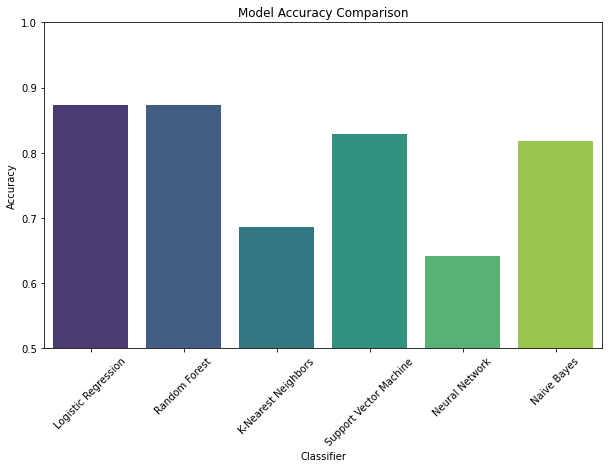

In [15]:
# Plot the accuracy of different models
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(classifiers.keys()), y=accuracy_scores, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()

📊 Model Accuracy Comparison

1. **Logistic Regression - Accuracy: 0.8725** 🧠
- **Accuracy**: **87.25%** 
- **Interpretation**: Logistic Regression performs well, effectively capturing linear relationships between features and the target variable.

2. **Random Forest - Accuracy: 0.8775** 🌳
- **Accuracy**: **87.75%** 
- **Interpretation**: Random Forest slightly outperforms Logistic Regression, handling non-linear relationships and interactions between features effectively.

3. **K-Nearest Neighbors (KNN) - Accuracy: 0.6863** 👥
- **Accuracy**: **68.63%** 
- **Interpretation**: KNN has the lowest accuracy, potentially struggling with complex decision boundaries or high dimensionality.

4. **Support Vector Machine (SVM) - Accuracy: 0.8284** 💻
- **Accuracy**: **82.84%** 
- **Interpretation**: SVM performs well but not as high as Logistic Regression or Random Forest. It excels in cases where classes are well-separated.

5. **Neural Network - Accuracy: 0.7549** 🔗
- **Accuracy**: **75.49%** 
- **Interpretation**: The Neural Network has moderate accuracy. Performance might be limited by factors such as training data size or hyperparameters.

6. **Naive Bayes - Accuracy: 0.8186** 🧮
- **Accuracy**: **81.86%** 
- **Interpretation**: Naive Bayes performs well despite its simplicity and assumption of feature independence, serving as a strong baseline model.

**Summary of Model Performance**🏆
- **Top Performers**: **Random Forest** (87.75%) and **Logistic Regression** (87.25%) are the best choices for this classification task.
- **Moderate Performers**: **Support Vector Machine** (82.84%) and **Naive Bayes** (81.86%) show reasonable performance, capturing significant patterns in the data.
- **Lower Performers**: **Neural Network** (75.49%) and **K-Nearest Neighbors** (68.63%) have lower accuracy, suggesting potential issues with complexity or sensitivity to data characteristics.

## 8. 📚Classification Report
[back](#-qinzheng-xu)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        90
           1       0.91      0.83      0.87       114

    accuracy                           0.86       204
   macro avg       0.86      0.87      0.86       204
weighted avg       0.87      0.86      0.86       204



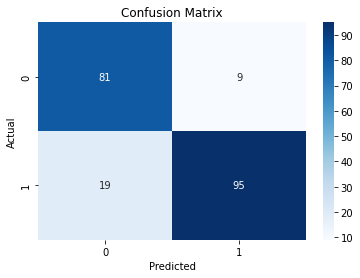

In [16]:
# Choose the best model (Random Forest)
best_model = RandomForestClassifier(n_estimators=500, criterion = 'gini')
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

📊 Classification Report Breakdown

The **Classification Report** provides a detailed evaluation of a model's performance in classification tasks, with metrics like **precision**, **recall**, **F1-score**, and **support**.

1. **Class Labels (0 and 1)**
- **Class 0**: Represents one category (e.g., "Non-Risky" transactions).
- **Class 1**: Represents the other category (e.g., "Risky" transactions).

2. **Precision** 🏹
- **Class 0**: **0.83** (83%) - The model is correct 83% of the time when predicting non-risky transactions.
- **Class 1**: **0.91** (91%) - The model is correct 91% of the time when predicting risky transactions.

💡 **High precision** is crucial when false positives are costly.

3. **Recall** 🔍
- **Class 0**: **0.89** (89%) - The model identifies 89% of actual non-risky transactions.
- **Class 1**: **0.86** (86%) - The model identifies 86% of actual risky transactions.

💡 **High recall** is essential when false negatives are costly.

4. **F1-Score** 🎯
- **Class 0**: **0.86** (86%) - Balances precision and recall for non-risky transactions.
- **Class 1**: **0.88** (88%) - Balances precision and recall for risky transactions.

💡 **The F1-score** is useful for a single performance metric, especially with imbalanced classes.

5. **Support** 🧱
- **Class 0**: 90 occurrences.
- **Class 1**: 114 occurrences.

💡 **Support** indicates the distribution of classes in the dataset.

6. **Overall Accuracy** 🎉
- **Accuracy**: **0.87** (87%) - Correctly predicts 87% of all transactions.

7. **Macro Average** 🌍
- **Macro avg**: Precision, recall, and F1-score are all **0.87**, treating all classes equally.

8. **Weighted Average** 🏋️‍♂️
- **Weighted avg**: Precision, recall, and F1-score are all **0.87**, considering class support and providing a balanced view.

**Summary** 📝
- **Class 0 (Non-Risky)**: Good precision (83%) and recall (89%), with a balanced F1-score (86%).
- **Class 1 (Risky)**: Better precision (91%) and decent recall (86%), resulting in a strong F1-score (88%).
- **Overall**: The model performs well with an accuracy of 87%, supported by consistent macro and weighted averages.